# Data cleaning and visualization
Using Pandas for data cleaning, Matplotlib and Seaborn for exploratory data analysis.

**Overview of the final goal**

In the following two lectures out goal is to analyze a pool of loans and assess their risk. The central question is whether the loans in question are good or bad in terms of their risk.
![Good_or_bad_credit](img\good_or_bad_credit.png)

There are multiple approaches that usually depend on the granularity of data available.
* Aggregated historical performance data can be used to create a high level assessment on different parts of the portfolio e.g. loans with more than 30 months maturity and more then 95% debt to income ratio are risky and we estimate 4% of them to default.
* Loan level historical performance data can be used to create a predictive model to make a prediction on each loan individually.

In today's lecture we'll use a loan level dataset to get our hands dirty with visualization and cleaning. Tomorrow we'll use clean dataset we prepare today and work on creating models.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Download-data-from-public-source-and-manually-adjust-it" data-toc-modified-id="Download-data-from-public-source-and-manually-adjust-it-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Download data from public source and manually adjust it</a></span></li><li><span><a href="#Load-csv-file-as-Pandas-dataframe" data-toc-modified-id="Load-csv-file-as-Pandas-dataframe-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load csv file as Pandas dataframe</a></span></li><li><span><a href="#Understanding-Pandas-dataframes-through-the-LendingClub-dataset" data-toc-modified-id="Understanding-Pandas-dataframes-through-the-LendingClub-dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Understanding Pandas dataframes through the LendingClub dataset</a></span><ul class="toc-item"><li><span><a href="#Select-a-few-important-columns-to-work-with" data-toc-modified-id="Select-a-few-important-columns-to-work-with-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Select a few important columns to work with</a></span></li><li><span><a href="#Exercise:-Try-selecting-a-different-set-of-columns-from-the-dataframe." data-toc-modified-id="Exercise:-Try-selecting-a-different-set-of-columns-from-the-dataframe.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Exercise: Try selecting a different set of columns from the dataframe.</a></span></li><li><span><a href="#Access-a-column-as-a-Series:" data-toc-modified-id="Access-a-column-as-a-Series:-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Access a column as a Series:</a></span></li><li><span><a href="#Access-values-by-numerical-indexing" data-toc-modified-id="Access-values-by-numerical-indexing-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Access values by numerical indexing</a></span></li><li><span><a href="#Exercise:-Try-selecting-values-from-a-different-numerical-column" data-toc-modified-id="Exercise:-Try-selecting-values-from-a-different-numerical-column-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Exercise: Try selecting values from a different numerical column</a></span></li><li><span><a href="#Unique-values-and-aggregations-on-categorical-variables" data-toc-modified-id="Unique-values-and-aggregations-on-categorical-variables-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Unique values and aggregations on categorical variables</a></span></li><li><span><a href="#Filtering-rows-with-conditions" data-toc-modified-id="Filtering-rows-with-conditions-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Filtering rows with conditions</a></span></li><li><span><a href="#Exercise:-Try-filtering-rows-by-another-column's-values" data-toc-modified-id="Exercise:-Try-filtering-rows-by-another-column's-values-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Exercise: Try filtering rows by another column's values</a></span></li><li><span><a href="#Which-fields-are-numerical-and-which-ones-are-categorical?" data-toc-modified-id="Which-fields-are-numerical-and-which-ones-are-categorical?-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Which fields are numerical and which ones are categorical?</a></span></li></ul></li><li><span><a href="#Task:-Check-the-Data-Dictionary-for-descriptions-of-fields" data-toc-modified-id="Task:-Check-the-Data-Dictionary-for-descriptions-of-fields-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Task: Check the Data Dictionary for descriptions of fields</a></span></li><li><span><a href="#Are-there-multiple-reports-for-individual-loans-or-just-one-record-per-loan?" data-toc-modified-id="Are-there-multiple-reports-for-individual-loans-or-just-one-record-per-loan?-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Are there multiple reports for individual loans or just one record per loan?</a></span></li><li><span><a href="#Missing-Values" data-toc-modified-id="Missing-Values-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Missing Values</a></span><ul class="toc-item"><li><span><a href="#Task:-Think-about-when-and-why-we-would-use-these-approaches" data-toc-modified-id="Task:-Think-about-when-and-why-we-would-use-these-approaches-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Task: Think about when and why we would use these approaches</a></span></li><li><span><a href="#Check-missing-values-for-this-dataset-for-each-field" data-toc-modified-id="Check-missing-values-for-this-dataset-for-each-field-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Check missing values for this dataset for each field</a></span></li><li><span><a href="#Exercise:-Please-remove-hardship_loan_status-from-the-dataframe" data-toc-modified-id="Exercise:-Please-remove-hardship_loan_status-from-the-dataframe-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Exercise: Please remove hardship_loan_status from the dataframe</a></span></li><li><span><a href="#Remove-all-rows-with-any-missing-values" data-toc-modified-id="Remove-all-rows-with-any-missing-values-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Remove all rows with any missing values</a></span></li></ul></li><li><span><a href="#Transforming-and-cleaning-individual-columns" data-toc-modified-id="Transforming-and-cleaning-individual-columns-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Transforming and cleaning individual columns</a></span><ul class="toc-item"><li><span><a href="#Creating-a-new-binary-target-variable-for-prediction" data-toc-modified-id="Creating-a-new-binary-target-variable-for-prediction-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Creating a new binary target variable for prediction</a></span></li><li><span><a href="#Creating-a-numerical-variable-from-grade" data-toc-modified-id="Creating-a-numerical-variable-from-grade-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Creating a numerical variable from <code>grade</code></a></span></li><li><span><a href="#Creating-a-numerical-variable-from-emp_length" data-toc-modified-id="Creating-a-numerical-variable-from-emp_length-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Creating a numerical variable from <code>emp_length</code></a></span></li><li><span><a href="#Creating-a-numerical-variable-from-term" data-toc-modified-id="Creating-a-numerical-variable-from-term-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Creating a numerical variable from <code>term</code></a></span></li><li><span><a href="#Creating-a-numerical-variable-from-int_rate" data-toc-modified-id="Creating-a-numerical-variable-from-int_rate-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Creating a numerical variable from <code>int_rate</code></a></span></li></ul></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Visualization</a></span><ul class="toc-item"><li><span><a href="#Create-histograms-for-distribution-of-numerical-variables" data-toc-modified-id="Create-histograms-for-distribution-of-numerical-variables-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Create histograms for distribution of numerical variables</a></span></li><li><span><a href="#Exercise:-Plot-a-histogram-for-other-numerical-variables" data-toc-modified-id="Exercise:-Plot-a-histogram-for-other-numerical-variables-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Exercise: Plot a histogram for other numerical variables</a></span></li><li><span><a href="#Create-Scatter-plots-to-understand-data-relationships" data-toc-modified-id="Create-Scatter-plots-to-understand-data-relationships-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Create Scatter plots to understand data relationships</a></span></li><li><span><a href="#Exercise:-Create-some-scatter-plots-from-variable-pairs-you'd-like-to-explore" data-toc-modified-id="Exercise:-Create-some-scatter-plots-from-variable-pairs-you'd-like-to-explore-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Exercise: Create some scatter plots from variable pairs you'd like to explore</a></span></li><li><span><a href="#Create-bar-plot-for-distribution-of-categorical-variables" data-toc-modified-id="Create-bar-plot-for-distribution-of-categorical-variables-8.5"><span class="toc-item-num">8.5&nbsp;&nbsp;</span>Create bar plot for distribution of categorical variables</a></span></li><li><span><a href="#Create-a-scatter-matrix-with-seaborn-(pairplot)-for-numerical-variables" data-toc-modified-id="Create-a-scatter-matrix-with-seaborn-(pairplot)-for-numerical-variables-8.6"><span class="toc-item-num">8.6&nbsp;&nbsp;</span>Create a scatter matrix with seaborn (pairplot) for numerical variables</a></span></li><li><span><a href="#Check-outliers-based-on-previous-two-steps" data-toc-modified-id="Check-outliers-based-on-previous-two-steps-8.7"><span class="toc-item-num">8.7&nbsp;&nbsp;</span>Check outliers based on previous two steps</a></span></li></ul></li><li><span><a href="#Save-the-dataframe-to-use-in-the-next-notebook." data-toc-modified-id="Save-the-dataframe-to-use-in-the-next-notebook.-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Save the dataframe to use in the next notebook.</a></span></li><li><span><a href="#Recap-and--Exercise:-Examine-the-final-dataset." data-toc-modified-id="Recap-and--Exercise:-Examine-the-final-dataset.-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Recap and  Exercise: Examine the final dataset.</a></span></li></ul></div>

## Download data from public source and manually adjust it

**Preparatory steps**

We have 
* downloaded the LendingClub 2007-2011 data file from https://www.lendingclub.com/info/download-data.action
* unzipped the csv file
* manually removed the first line of the download data file
* renamed the file to "LendingClub.csv"

**Data file for the current lecture**

We will be working with the following file:
[LendingClub.csv](LendingClub.csv)

## Load csv file as Pandas dataframe

In [1]:
# Imports
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from datetime import datetime

In [2]:
# Read in the dataset
filename = 'LendingClub.csv'
raw_data_all = pd.read_csv(filename, low_memory=False)

In [3]:
# Check the data
raw_data_all.head()
# Not all columns showing.. too many of them... check Dictionary for field names

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


## Understanding Pandas dataframes through the LendingClub dataset
As we'll be working with Pandas dataframes throughout the lecture, let's take some time to understand the basic concepts.

### Select a few important columns to work with
As there are many columns we'll just select a few more important ones to keep.
- We first create a list of column names to keep.
- The right hand side of the following command creates a new dataframe by selecting a list of columns from an existing dataframe. To reuse the original variable name, we'll just assign the newly created dataframe to the original 'raw_data' variable.

In [4]:
# List of columns to keep
cols = ['loan_amnt', 'term', 'int_rate', 'funded_amnt', 'grade', 'annual_inc', 'dti', 'hardship_loan_status', 'delinq_2yrs', 'emp_length','loan_status','home_ownership','tax_liens']
# Dataframe with selected columns
raw_data = raw_data_all[cols]

In [5]:
#Let's check the top rows
raw_data.head()

,loan_amnt,term,int_rate,funded_amnt,grade,annual_inc,dti,hardship_loan_status,delinq_2yrs,emp_length,loan_status,home_ownership,tax_liens
0,5000.0,36 months,10.65%,5000.0,B,24000.0,27.65,NaN,0.0,10+ years,Fully Paid,RENT,0.0
1,2500.0,60 months,15.27%,2500.0,C,30000.0,1.00,NaN,0.0,< 1 year,Charged Off,RENT,0.0
2,2400.0,36 months,15.96%,2400.0,C,12252.0,8.72,NaN,0.0,10+ years,Fully Paid,RENT,0.0
3,10000.0,36 months,13.49%,10000.0,C,49200.0,20.00,NaN,0.0,10+ years,Fully Paid,RENT,0.0
4,3000.0,60 months,12.69%,3000.0,B,80000.0,17.94,NaN,0.0,1 year,Fully Paid,RENT,0.0


**What is the type of the object created in this way?**

Let's select two columns and see what we get

In [6]:
type(raw_data[['loan_amnt', 'term']])

pandas.core.frame.DataFrame

In [7]:
raw_data[['loan_amnt', 'term']].head()

,loan_amnt,term
0,5000.0,36 months
1,2500.0,60 months
2,2400.0,36 months
3,10000.0,36 months
4,3000.0,60 months


This also works for creating a dataframe with one column. For Pandas to know we want a dataframe, we still need to use a list, in this case with just one element.

In [8]:
type(raw_data[['loan_amnt']])

pandas.core.frame.DataFrame

In [9]:
raw_data[['loan_amnt']].head()

,loan_amnt
0,5000.0
1,2500.0
2,2400.0
3,10000.0
4,3000.0


### Exercise: Try selecting a different set of columns from the dataframe.
Remember NOT to overwrite the variable raw_data

### Access a column as a Series: 

Single column object without a DataFrame wrapper.

A dataframe's purpose is to store data of a table format having multiple columns and rows. While a dataframe containing a single column is possible and sometimes appropriate, in many cases we'd be better off referencing a column not as a table but the way it really is: a series of values.

There are multiple ways to reference a column. Once a column is selected we can index it similar to simple Python Arrays to select elements.

**Referencing a column as a field of the DataFrame object**

In [10]:
# Select top 5 rows of column "funded_amnt"
raw_data.funded_amnt[:5]

0     5000.0
1     2500.0
2     2400.0
3    10000.0
4     3000.0
Name: funded_amnt, dtype: float64

**Referencing a column by indexing**

In [11]:
# Select top 5 rows of column "funded_amnt"
raw_data['funded_amnt'][:5]

0     5000.0
1     2500.0
2     2400.0
3    10000.0
4     3000.0
Name: funded_amnt, dtype: float64

### Access values by numerical indexing
There is a way to access the dataframe the way we would access elements of a matrix with numerical indices.

Note: the first index is the row index and the second index is the column index:

`data.iloc[row,column]`

In [12]:
raw_data.columns.tolist()

['loan_amnt',
 'term',
 'int_rate',
 'funded_amnt',
 'grade',
 'annual_inc',
 'dti',
 'hardship_loan_status',
 'delinq_2yrs',
 'emp_length',
 'loan_status',
 'home_ownership',
 'tax_liens']

In [13]:
# Select top 5 rows of the column with the index 3. 
#Note: indexing starts with 0, so this is the "funded_amnt" column.
raw_data.iloc[:5,3]

0     5000.0
1     2500.0
2     2400.0
3    10000.0
4     3000.0
Name: funded_amnt, dtype: float64

**What is the type of this object?**

Every column in a Pandas dataframe is a Series object.

In [14]:
type(raw_data['funded_amnt'])

pandas.core.series.Series

Let's do some calculations with object. Since this is a numerical Series, we can do numerical operations e.g. calculating the mean, multiplying by 2, etc.

In [15]:
raw_data.funded_amnt.mean()

10821.585752909368

In [16]:
raw_data.funded_amnt[:5] * 2

0    10000.0
1     5000.0
2     4800.0
3    20000.0
4     6000.0
Name: funded_amnt, dtype: float64

### Exercise: Try selecting values from a different numerical column

### Unique values and aggregations on categorical variables
First let's see the unique values. Note that the result is not a series but a numpy array.

In [17]:
raw_data.grade.unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G', nan], dtype=object)

Let's see how many times each value appears in this series using the built in method `value_counts()` of a Series.

In [18]:
raw_data.grade.value_counts()

B    12389
A    10183
C     8740
D     6016
E     3394
F     1301
G      512
Name: grade, dtype: int64

**Group by**

We can do the same by using the full dataframe using a group by expression. Let's see the following SQL example for using group by to do aggregations on a dataset:
![Group by example](img\groupby_example.png)
Image source: https://www.w3resource.com/sql/aggregate-functions/sum-with-group-by.php

In [19]:
raw_data.groupby(by='grade').agg('count')

,loan_amnt,term,int_rate,funded_amnt,annual_inc,dti,hardship_loan_status,delinq_2yrs,emp_length,loan_status,home_ownership,tax_liens
grade,,,,,,,,,,,,
A,10183,10183,10183,10183,10179,10183,0,10172,10183,10183,10183,10153
B,12389,12389,12389,12389,12389,12389,0,12379,12389,12389,12389,12367
C,8740,8740,8740,8740,8740,8740,0,8734,8740,8740,8740,8719
D,6016,6016,6016,6016,6016,6016,0,6015,6016,6016,6016,6003
E,3394,3394,3394,3394,3394,3394,0,3393,3394,3394,3394,3383
F,1301,1301,1301,1301,1301,1301,0,1301,1301,1301,1301,1295
G,512,512,512,512,512,512,0,512,512,512,512,510


Note: the function name "agg" means that we perform an operation on each group, in an aggregated way

In [20]:
raw_data.groupby(by='grade').grade.agg('count')

grade
A    10183
B    12389
C     8740
D     6016
E     3394
F     1301
G      512
Name: grade, dtype: int64

### Filtering rows with conditions
Let's see how we can filter down rows based on column values.
We will select only those loans where the income of the borrower is greater than $1.000.000

In [21]:
raw_data[raw_data.annual_inc > 1000000]

,loan_amnt,term,int_rate,funded_amnt,grade,annual_inc,dti,hardship_loan_status,delinq_2yrs,emp_length,loan_status,home_ownership,tax_liens
7268,12025.0,36 months,14.27%,12025.0,C,1782000.0,1.31,NaN,0.0,10+ years,Fully Paid,RENT,0.0
10650,15775.0,60 months,12.99%,15775.0,C,1250000.0,21.81,NaN,0.0,2 years,Charged Off,MORTGAGE,0.0
21477,10000.0,36 months,6.54%,10000.0,A,1200000.0,1.46,NaN,0.0,10+ years,Fully Paid,OWN,0.0
23618,1500.0,36 months,6.17%,1500.0,A,1900000.0,0.57,NaN,0.0,5 years,Fully Paid,MORTGAGE,0.0
24233,25000.0,60 months,15.20%,25000.0,D,1200000.0,0.41,NaN,0.0,10+ years,Fully Paid,RENT,0.0
25831,12000.0,36 months,7.51%,12000.0,A,1200000.0,9.17,NaN,0.0,1 year,Fully Paid,MORTGAGE,0.0
27633,5600.0,60 months,13.61%,5600.0,C,1176000.0,1.22,NaN,1.0,10+ years,Fully Paid,MORTGAGE,0.0
28975,4500.0,60 months,7.88%,4500.0,A,1080000.0,0.57,NaN,0.0,8 years,Fully Paid,MORTGAGE,0.0
29708,25000.0,60 months,10.62%,15500.0,B,3900000.0,0.20,NaN,0.0,3 years,Fully Paid,MORTGAGE,0.0
30176,5000.0,36 months,12.73%,5000.0,C,6000000.0,0.01,NaN,0.0,10+ years,Fully Paid,MORTGAGE,0.0


**How does this work?**

The filter creates a boolean series showing which row satisfies the filter condition and which row does not. The boolean series is then used to index the dataframe.

Let's create a filter for just grade "A".

In [22]:
grade_filter = raw_data.grade == 'A'
print(type(grade_filter))
print(grade_filter)

<class 'pandas.core.series.Series'>
0        False
1        False
2        False
3        False
4        False
5         True
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17        True
18       False
19        True
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
42508    False
42509    False
42510    False
42511    False
42512     True
42513    False
42514    False
42515    False
42516    False
42517    False
42518    False
42519     True
42520     True
42521     True
42522     True
42523     True
42524    False
42525    False
42526    False
42527    False
42528    False
42529    False
42530    False
42531    False
42532    False
42533    False
42534     True
42535     True
42536    False
42537    False
Name: grade, Length: 42538, dtype: bool


In [23]:
raw_data[grade_filter].head()

,loan_amnt,term,int_rate,funded_amnt,grade,annual_inc,dti,hardship_loan_status,delinq_2yrs,emp_length,loan_status,home_ownership,tax_liens
5,5000.0,36 months,7.90%,5000.0,A,36000.00,11.20,NaN,0.0,3 years,Fully Paid,RENT,0.0
17,3600.0,36 months,6.03%,3600.0,A,110000.00,10.52,NaN,0.0,10+ years,Fully Paid,MORTGAGE,0.0
19,9200.0,36 months,6.03%,9200.0,A,77385.19,9.86,NaN,0.0,6 years,Fully Paid,RENT,0.0
30,4375.0,36 months,7.51%,4375.0,A,17108.00,20.34,NaN,0.0,7 years,Fully Paid,MORTGAGE,0.0
31,31825.0,36 months,7.90%,31825.0,A,75000.00,14.03,NaN,0.0,5 years,Fully Paid,MORTGAGE,0.0


### Exercise: Try filtering rows by another column's values

<center><i>**Congratulations! At this point you've mastered the most important pieces for working with data in Pandas!**<i></center>

### Which fields are numerical and which ones are categorical?
We can get the type info for all variables at once to get an overview in a compact format

In [24]:
#Check field types
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 13 columns):
loan_amnt               42535 non-null float64
term                    42535 non-null object
int_rate                42535 non-null object
funded_amnt             42535 non-null float64
grade                   42535 non-null object
annual_inc              42531 non-null float64
dti                     42535 non-null float64
hardship_loan_status    0 non-null float64
delinq_2yrs             42506 non-null float64
emp_length              42535 non-null object
loan_status             42535 non-null object
home_ownership          42535 non-null object
tax_liens               42430 non-null float64
dtypes: float64(7), object(6)
memory usage: 4.2+ MB


## Task: Check the Data Dictionary for descriptions of fields

Please check the following fields:
    - grade
    - dti
    - delinq_2yrs
    - tax_liens

## Are there multiple reports for individual loans or just one record per loan? 

There could be multiple reasons for having multiple records for a loan
    - duplicate rows
    - loan history tracked over time

If our goal is not working with time series data for individual loans we can keep only the last reports per loan. This will contain the latest available information.

Do you have any ideas for how to accomplish this?

For the dataset we are working on there is a unique record for each loan, thus we don't have to worry about this step in our case.

## Missing Values
Most algorithms assume all values are available and can't handle missing data. The action to take for missing values depends on both the ratio of missing to total values and the field of application / variable meaning.

For fields with high missing rate: 
    - drop the field as it's probably useless with so many values missing
    
For fields with low missing rate we can have multiple approaches
    - drop rows with any empty value
    - impute missing values by
        - mean
        - mode
        - extreme values in case we need to be conservative (check the use case)
        - predict the missing values using the other fields

### Task: Think about when and why we would use these approaches

### Check missing values for this dataset for each field

Let's check Null values - missing data cells for individual loans. 
Are there any variables that we would discard?

In [25]:
raw_data.isnull().sum(axis=0)

loan_amnt                   3
term                        3
int_rate                    3
funded_amnt                 3
grade                       3
annual_inc                  7
dti                         3
hardship_loan_status    42538
delinq_2yrs                32
emp_length                  3
loan_status                 3
home_ownership              3
tax_liens                 108
dtype: int64

### Exercise: Please remove hardship_loan_status from the dataframe
Hint: check out the .drop() command on a Pandas dataframe

Note that axis=0 means row indexes, so it is used when removing a row,<br/>
and axis=1 means column indexes, so it is used when removing a column

In [26]:
raw_data = raw_data.drop('hardship_loan_status', axis=1)
raw_data.head()

,loan_amnt,term,int_rate,funded_amnt,grade,annual_inc,dti,delinq_2yrs,emp_length,loan_status,home_ownership,tax_liens
0,5000.0,36 months,10.65%,5000.0,B,24000.0,27.65,0.0,10+ years,Fully Paid,RENT,0.0
1,2500.0,60 months,15.27%,2500.0,C,30000.0,1.00,0.0,< 1 year,Charged Off,RENT,0.0
2,2400.0,36 months,15.96%,2400.0,C,12252.0,8.72,0.0,10+ years,Fully Paid,RENT,0.0
3,10000.0,36 months,13.49%,10000.0,C,49200.0,20.00,0.0,10+ years,Fully Paid,RENT,0.0
4,3000.0,60 months,12.69%,3000.0,B,80000.0,17.94,0.0,1 year,Fully Paid,RENT,0.0


### Remove all rows with any missing values

In [27]:
raw_data = raw_data.dropna()

In [28]:
#Check null values again
raw_data.isnull().sum(axis=0)

loan_amnt         0
term              0
int_rate          0
funded_amnt       0
grade             0
annual_inc        0
dti               0
delinq_2yrs       0
emp_length        0
loan_status       0
home_ownership    0
tax_liens         0
dtype: int64

## Transforming and cleaning individual columns

### Creating a new binary target variable for prediction
We will predict loan defaults in the second notebook. For that we'll need binary target variable for which we can use the "`loan_status`" column's values.

**Check values of the loan status variable and keep only relevant ones**

In [29]:
raw_data.loan_status.value_counts()

Fully Paid                                             34078
Charged Off                                             5669
Does not meet the credit policy. Status:Fully Paid      1932
Does not meet the credit policy. Status:Charged Off      751
Name: loan_status, dtype: int64

Let's keep only the loans with `Fully Paid` and `Charged Off` status as the other ones are special cases and are not of our interest for this analysis.
For this we can filter down the dataframe's rows by these two values.

In [30]:
raw_data = raw_data[(raw_data['loan_status'] == 'Fully Paid') | (raw_data['loan_status'] == 'Charged Off')]

In [31]:
raw_data.loan_status.value_counts()

Fully Paid     34078
Charged Off     5669
Name: loan_status, dtype: int64

**Map categorial values to a newly created binary target**

In [32]:
#Let's check the first 10 loans
raw_data.loan_status[:10]

0     Fully Paid
1    Charged Off
2     Fully Paid
3     Fully Paid
4     Fully Paid
5     Fully Paid
6     Fully Paid
7     Fully Paid
8    Charged Off
9    Charged Off
Name: loan_status, dtype: object

We can create a dictionary and use it for translation.

In [33]:
#Create a dictionary to use for translation
def_map = {'Fully Paid': 0, 'Charged Off': 1}
def_map

{'Charged Off': 1, 'Fully Paid': 0}

We can use the `.map()` command to apply a function or a mapping dictionary on each row of the dataframe.

In [34]:
#Check how mapping the values works
raw_data.loan_status.map(def_map)[:10]

0    0
1    1
2    0
3    0
4    0
5    0
6    0
7    0
8    1
9    1
Name: loan_status, dtype: int64

In [35]:
#Create the new column
raw_data['defaulted'] = raw_data.loan_status.map(def_map)

Let's remove the original `loan_status` column

In [36]:
raw_data = raw_data.drop('loan_status', axis=1)

In [37]:
raw_data.head()

,loan_amnt,term,int_rate,funded_amnt,grade,annual_inc,dti,delinq_2yrs,emp_length,home_ownership,tax_liens,defaulted
0,5000.0,36 months,10.65%,5000.0,B,24000.0,27.65,0.0,10+ years,RENT,0.0,0
1,2500.0,60 months,15.27%,2500.0,C,30000.0,1.00,0.0,< 1 year,RENT,0.0,1
2,2400.0,36 months,15.96%,2400.0,C,12252.0,8.72,0.0,10+ years,RENT,0.0,0
3,10000.0,36 months,13.49%,10000.0,C,49200.0,20.00,0.0,10+ years,RENT,0.0,0
4,3000.0,60 months,12.69%,3000.0,B,80000.0,17.94,0.0,1 year,RENT,0.0,0


### Creating a numerical variable from `grade`
Let's do the same process for `Grade`. Here we can use the ordinal nature of the grades to create a numerical column.

In [38]:
raw_data.grade.unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [39]:
#Create a dictionary to use for translation
grade_map = {'A': 1, 'B': 2, 'C': 3, 'D':4, 'E':5, 'F':6, 'G':7}
grade_map

{'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}

In [40]:
raw_data.grade[:10]

0    B
1    C
2    C
3    C
4    B
5    A
6    C
7    E
8    F
9    B
Name: grade, dtype: object

In [41]:
raw_data.grade.map(grade_map)[:10]

0    2
1    3
2    3
3    3
4    2
5    1
6    3
7    5
8    6
9    2
Name: grade, dtype: int64

In [42]:
#Overwrite the column
raw_data.grade = raw_data.grade.map(grade_map)

In [43]:
raw_data.head()

,loan_amnt,term,int_rate,funded_amnt,grade,annual_inc,dti,delinq_2yrs,emp_length,home_ownership,tax_liens,defaulted
0,5000.0,36 months,10.65%,5000.0,2,24000.0,27.65,0.0,10+ years,RENT,0.0,0
1,2500.0,60 months,15.27%,2500.0,3,30000.0,1.00,0.0,< 1 year,RENT,0.0,1
2,2400.0,36 months,15.96%,2400.0,3,12252.0,8.72,0.0,10+ years,RENT,0.0,0
3,10000.0,36 months,13.49%,10000.0,3,49200.0,20.00,0.0,10+ years,RENT,0.0,0
4,3000.0,60 months,12.69%,3000.0,2,80000.0,17.94,0.0,1 year,RENT,0.0,0


### Creating a numerical variable from `emp_length`

In [44]:
raw_data.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', 'n/a'], dtype=object)

In [45]:
emp_map = {str(i) + ' years' : i for i in range(1,10)}
emp_map

{'1 years': 1,
 '2 years': 2,
 '3 years': 3,
 '4 years': 4,
 '5 years': 5,
 '6 years': 6,
 '7 years': 7,
 '8 years': 8,
 '9 years': 9}

In [46]:
emp_map['< 1 year'] = 0
emp_map['n/a'] = 0
emp_map['10+ years'] = 10
emp_map['1 year'] = 1
emp_map

{'1 year': 1,
 '1 years': 1,
 '10+ years': 10,
 '2 years': 2,
 '3 years': 3,
 '4 years': 4,
 '5 years': 5,
 '6 years': 6,
 '7 years': 7,
 '8 years': 8,
 '9 years': 9,
 '< 1 year': 0,
 'n/a': 0}

In [47]:
raw_data.emp_length[:10]

0    10+ years
1     < 1 year
2    10+ years
3    10+ years
4       1 year
5      3 years
6      8 years
7      9 years
8      4 years
9     < 1 year
Name: emp_length, dtype: object

In [48]:
raw_data.emp_length.map(emp_map)[:10]

0    10
1     0
2    10
3    10
4     1
5     3
6     8
7     9
8     4
9     0
Name: emp_length, dtype: int64

In [49]:
#Overwrite the column
raw_data.emp_length = raw_data.emp_length.map(emp_map)
raw_data.emp_length.unique()

array([10,  0,  1,  3,  8,  9,  4,  5,  6,  2,  7], dtype=int64)

In [50]:
raw_data.head()

,loan_amnt,term,int_rate,funded_amnt,grade,annual_inc,dti,delinq_2yrs,emp_length,home_ownership,tax_liens,defaulted
0,5000.0,36 months,10.65%,5000.0,2,24000.0,27.65,0.0,10,RENT,0.0,0
1,2500.0,60 months,15.27%,2500.0,3,30000.0,1.00,0.0,0,RENT,0.0,1
2,2400.0,36 months,15.96%,2400.0,3,12252.0,8.72,0.0,10,RENT,0.0,0
3,10000.0,36 months,13.49%,10000.0,3,49200.0,20.00,0.0,10,RENT,0.0,0
4,3000.0,60 months,12.69%,3000.0,2,80000.0,17.94,0.0,1,RENT,0.0,0


### Creating a numerical variable from `term`
It is usually good practice to create numerical values of strings representing numbers. Many algorithms can't handle categorical variables.
Let's check the unique values of the term column and extract the number values.

In [51]:
raw_data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

As the numerical values are always contained in the 2nd and the 3rd character of the string, we can simply extract that substring with the `slide()` indexing and convert it into integer type.

Fortunately there's a function in pandas called `pd.to_numeric()` that can convert numeric values stored as string to numeric types.

In [52]:
raw_data.term = pd.to_numeric(raw_data.term.str.slice(1,3))

Let's check the resulting data type

In [53]:
type(raw_data.term[0])

numpy.int64

In [54]:
raw_data.head()

,loan_amnt,term,int_rate,funded_amnt,grade,annual_inc,dti,delinq_2yrs,emp_length,home_ownership,tax_liens,defaulted
0,5000.0,36,10.65%,5000.0,2,24000.0,27.65,0.0,10,RENT,0.0,0
1,2500.0,60,15.27%,2500.0,3,30000.0,1.00,0.0,0,RENT,0.0,1
2,2400.0,36,15.96%,2400.0,3,12252.0,8.72,0.0,10,RENT,0.0,0
3,10000.0,36,13.49%,10000.0,3,49200.0,20.00,0.0,10,RENT,0.0,0
4,3000.0,60,12.69%,3000.0,2,80000.0,17.94,0.0,1,RENT,0.0,0


### Creating a numerical variable from `int_rate`
The column `int_rate` looks fine from just looking at the table, but let's see what type of values does it contain.

In [55]:
print type(raw_data.int_rate[0])
raw_data.int_rate[0]

<type 'str'>


' 10.65%'

Spoiler: the `pd.to_numeric()` it will not work here, guess why...

In [56]:
raw_data.int_rate = pd.to_numeric(raw_data.int_rate.map(lambda s: s.replace('%', '')))

In [57]:
raw_data.int_rate[:3]

0    10.65
1    15.27
2    15.96
Name: int_rate, dtype: float64

In [58]:
raw_data.head()

,loan_amnt,term,int_rate,funded_amnt,grade,annual_inc,dti,delinq_2yrs,emp_length,home_ownership,tax_liens,defaulted
0,5000.0,36,10.65,5000.0,2,24000.0,27.65,0.0,10,RENT,0.0,0
1,2500.0,60,15.27,2500.0,3,30000.0,1.00,0.0,0,RENT,0.0,1
2,2400.0,36,15.96,2400.0,3,12252.0,8.72,0.0,10,RENT,0.0,0
3,10000.0,36,13.49,10000.0,3,49200.0,20.00,0.0,10,RENT,0.0,0
4,3000.0,60,12.69,3000.0,2,80000.0,17.94,0.0,1,RENT,0.0,0


In [59]:
raw_data.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

## Visualization

### Create histograms for distribution of numerical variables
Check distribution of numerical variables

In [60]:
raw_data.describe()

,loan_amnt,term,int_rate,funded_amnt,grade,annual_inc,dti,delinq_2yrs,emp_length,tax_liens,defaulted
count,39747.000000,39747.000000,39747.000000,39747.000000,39747.000000,3.974700e+04,39747.000000,39747.000000,39747.000000,39747.0,39747.000000
mean,11236.332302,42.454827,12.030491,10963.426800,2.579993,6.895670e+04,13.323240,0.146527,4.841422,0.0,0.142627
std,7465.205713,10.642082,3.727823,7194.677881,1.388236,6.376120e+04,6.676606,0.491886,3.605752,0.0,0.349697
min,500.000000,36.000000,5.420000,500.000000,1.000000,4.000000e+03,0.000000,0.000000,0.000000,0.0,0.000000
25%,5500.000000,36.000000,9.250000,5400.000000,1.000000,4.050000e+04,8.190000,0.000000,2.000000,0.0,0.000000
50%,10000.000000,36.000000,11.860000,9700.000000,2.000000,5.900000e+04,13.410000,0.000000,4.000000,0.0,0.000000
75%,15000.000000,60.000000,14.590000,15000.000000,3.000000,8.226700e+04,18.600000,0.000000,9.000000,0.0,0.000000
max,35000.000000,60.000000,24.590000,35000.000000,7.000000,6.000000e+06,29.990000,11.000000,10.000000,0.0,1.000000


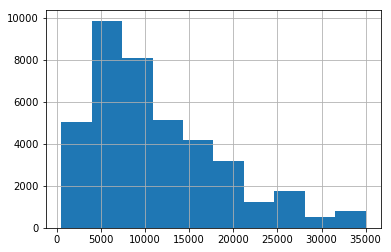

In [61]:
raw_data['loan_amnt'].hist()
plt.show()

### Exercise: Plot a histogram for other numerical variables
Hint: you may have to set the number of bins and even filter the values in case the distribution is very skewed.

In [62]:
#Some Solutions

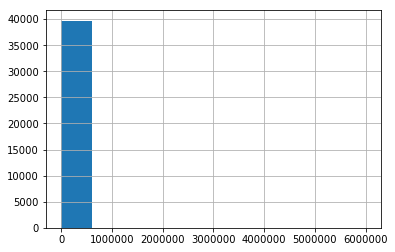

In [63]:
raw_data['annual_inc'].hist()
plt.show()
#Outliers!!

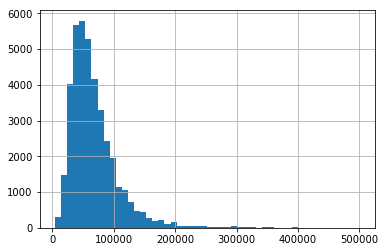

In [64]:
raw_data[raw_data['annual_inc'] <= 500000].annual_inc.hist(bins=50)
plt.show()
#Outliers!!

### Create Scatter plots to understand data relationships

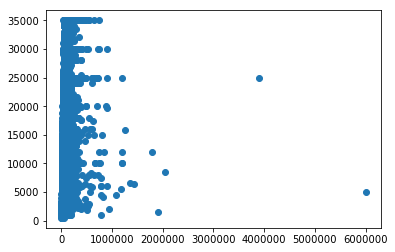

In [65]:
plt.scatter(raw_data['annual_inc'], raw_data['loan_amnt'])
plt.show()

### Exercise: Create some scatter plots from variable pairs you'd like to explore

### Create bar plot for distribution of categorical variables

### Create a scatter matrix with seaborn (pairplot) for numerical variables

### Check outliers based on previous two steps

## Save the dataframe to use in the next notebook.
Pandas objects are equipped with to_pickle methods which use Python’s Pickle module to persist data structures to disk using the pickle format.

We'll load back this object in the next lecture.

In [66]:
raw_data.to_pickle('Lendmark_clean.pkl')

## Recap and  Exercise: Examine the final dataset.
Today we explored, understood and cleaned the Lendmark dataset.
In the next lecture we will build models for predicting defaults.

How many Features / Rows do we have left?

In [67]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39747 entries, 0 to 39753
Data columns (total 12 columns):
loan_amnt         39747 non-null float64
term              39747 non-null int64
int_rate          39747 non-null float64
funded_amnt       39747 non-null float64
grade             39747 non-null int64
annual_inc        39747 non-null float64
dti               39747 non-null float64
delinq_2yrs       39747 non-null float64
emp_length        39747 non-null int64
home_ownership    39747 non-null object
tax_liens         39747 non-null float64
defaulted         39747 non-null int64
dtypes: float64(7), int64(4), object(1)
memory usage: 5.2+ MB
